# 1. Set Up

In [1]:
%%time
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()
print(role)
sess = sagemaker.Session()


import os
import urllib.request

arn:aws:iam::743025358310:role/service-role/AmazonSageMaker-ExecutionRole-20210528T211254
CPU times: user 793 ms, sys: 101 ms, total: 894 ms
Wall time: 849 ms


# 2. Defining Our Endpoints

In [2]:
endpoint_name = 'object-detection-2021-06-25-13-00-24-424'

# 3. Defining Our Predictor

In [3]:
object_detector = sagemaker.predictor.Predictor(endpoint_name = endpoint_name,sagemaker_session = sess)
print(object_detector)

# 4. Defining Detection Vizualizer

In [4]:

# This is a function that helps in visualizing the detections and draws the corresponding bounding boxes

def visualize_detection(img_file, dets, classes=[], thresh=0.6):
    """
    visualize detections in one image
    Parameters:
    ----------
    img : numpy.array
        image, in bgr format
    dets : numpy.array
        ssd detections, numpy.array([[id, score, x1, y1, x2, y2]...])
        each row is one object
    classes : tuple or list of str
        class names
    thresh : float
        score threshold
    """
    import random
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    img = mpimg.imread(img_file)
    plt.imshow(img)
    height = img.shape[0]
    width = img.shape[1]
    colors = dict()
    for det in dets:
        (klass, score, x0, y0, x1, y1) = det
        if score < thresh:
            continue
        cls_id = int(klass)
        if cls_id not in colors:
            colors[cls_id] = (random.random(), random.random(), random.random())
        xmin = int(x0 * width)
        ymin = int(y0 * height)
        xmax = int(x1 * width)
        ymax = int(y1 * height)
        rect = plt.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            fill=False,
            edgecolor=colors[cls_id],
            linewidth=3.5,
        )
        plt.gca().add_patch(rect)
        class_name = str(cls_id)
        if classes and len(classes) > cls_id:
            class_name = classes[cls_id]
        plt.gca().text(
            xmin,
            ymin - 2,
            "{:s} {:.3f}".format(class_name, score),
            bbox=dict(facecolor=colors[cls_id], alpha=0.5),
            fontsize=12,
            color="white",
        )
    plt.show()

# 5. Defining our classes and threshold

In [5]:
object_categories = [
    'Good_Day_Butter',
    'Good_Day_Pista',
    'Patanjali_Aloevera',
    'Patanjali_Haldi_Chandan',
    'Patanjali_Neem'
]


# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
threshold = 0.20



# 6. Predicting With One image 

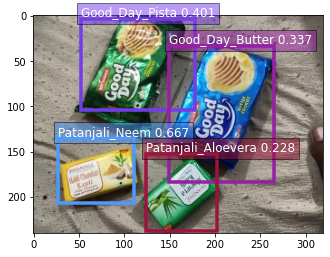

In [6]:
import json

#image name
file_name = './Test_Images/IMG_20210621_212926_DRO.jpg'

with open(file_name, 'rb') as image:
    f = image.read()
    b = bytearray(f)
    ne = open('n.txt','wb')
    ne.write(b)
results = object_detector.predict(b, initial_args={'ContentType': 'image/jpeg'})
detections = json.loads(results)
# print (detections)


# Visualize the detections.
visualize_detection(file_name, detections["prediction"], object_categories, threshold)

# 7. Predicting a whole directory

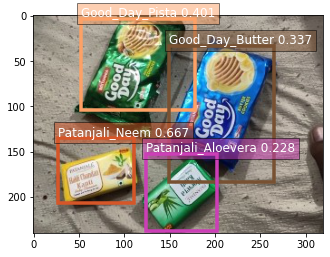

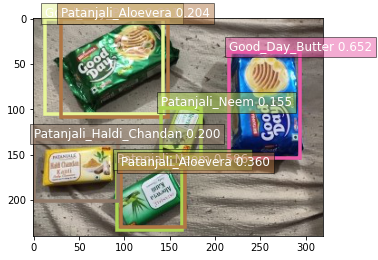

In [9]:
import json
import glob
threshold = 0.10
imdir = 'Test_Images/'
ext = ['jpg',]    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
newfiles = files[:15]
for file_name in newfiles:
    with open(file_name,'rb') as image:
        f = image.read()
        b = bytearray(f)
        ne = open('n.txt','wb')
        ne.write(b)
    results = object_detector.predict(b, initial_args={'ContentType': 'image/jpeg'})
    detections = json.loads(results)
    visualize_detection(file_name, detections["prediction"], object_categories, threshold)
